<a href="https://colab.research.google.com/github/jiali25/Design-of-a-system-for-the-analysis-of-reverberant-acoustic-environments-using-Deep-Learning/blob/master/Room_Classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Acceso a Google Drive**

In [0]:
# Para acceder al Google Drive donde esta TIMIT
from google.colab import drive
drive.mount('/content/drive')

Desde la máquina se accede a través del directorio /content/drive/My Drive

Se debe ver los directorios TIMIT y REVER

In [0]:
# Ver qué directorios hay en mi Drive
ls '/content/drive/My Drive/'

'Colab Notebooks'/   Documentos/   foo.txt   REVER/   REVERBERADOS/   TIMIT/


## Copiar y descomprimir TIMIT

In [0]:
# Copiar y descomprimir train de TIMIT
!cp /content/drive/'My Drive'/TIMIT/TIMIT-20200324T163854Z-001.zip /content/

! unzip -q TIMIT-20200324T163854Z-001.zip

replace TIMIT/doc/SPKRINFO.TXT? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [0]:
ls

air_binaural_aula_carolina_1_1_3_45_3.mat  drive/
air_binaural_booth_1_1_1.mat               __MACOSX/
air_binaural_lecture_1_1_1.mat             sample_data/
air_binaural_meeting_1_1_1.mat             TEST_SIN_SA/
air_binaural_office_1_1_1.mat              TEST_SIN_SA.zip
air_binaural_stairway_1_1_1_75.mat         TIMIT/
best_model.h5                              TIMIT-20200324T163854Z-001.zip


In [0]:
# Copiar y descomprimir test de TIMIT
!cp /content/drive/'My Drive'/TIMIT/TEST_SIN_SA.zip /content/

! unzip -q TEST_SIN_SA.zip

replace TEST_SIN_SA/test/dr4/mgmm0/sx139.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [0]:
ls

air_binaural_aula_carolina_1_1_3_45_3.mat  drive/
air_binaural_booth_1_1_1.mat               __MACOSX/
air_binaural_lecture_1_1_1.mat             sample_data/
air_binaural_meeting_1_1_1.mat             TEST_SIN_SA/
air_binaural_office_1_1_1.mat              TEST_SIN_SA.zip
air_binaural_stairway_1_1_1_75.mat         TIMIT/
best_model.h5                              TIMIT-20200324T163854Z-001.zip


In [0]:
# Importar bibliotecas
import os
import sys
import shutil
import re
import librosa
import numpy as np
from scipy.io.wavfile import write
from scipy.io import loadmat
from scipy import signal

# **Histograma**

In [0]:
# Histograma para ver los audios totales con sus respectivas duraciones
#TIMITdir_train = './TIMIT/train/'

#histogram = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

#Min_Sec1 = 1
#Min_Sec15 = 1.5
#Min_Sec2 = 2 
#Min_Sec25 = 2.5
#Min_Sec3 = 3
#Min_Sec35 = 3.5
#Min_Sec4 = 4
#Min_Sec45 = 4.5
#Min_Sec5 = 5
#Min_Sec55 = 5.5
#Min_Sec6 = 6

#for subdir, dirs, files in os.walk(TIMITdir_train):
#    for file in files:
#        filepath = subdir + os.sep + file
#        if filepath.endswith(".wav"):
#            audio, sr = librosa.core.load(filepath, sr=16000)
#            # CHECK if audio has more that Min_Sec. Si el audio dura menos que Min_Sec="2" no se procesa
#            #if len(audio) < Min_Sec * sr:
#              #print('Audio rechazado: ', filepath)
#              #print('Duración en muestras: ', len(audio))
#              #break
#            if len(audio) < Min_Sec1 * sr:
#              histogram[0] += 1
#            elif len(audio) < Min_Sec15 * sr:
#              histogram[1] += 1
#            elif len(audio) < Min_Sec2 * sr:
#              histogram[2] += 1
#            elif len(audio) < Min_Sec25 * sr:
#              histogram[3] += 1
#            elif len(audio) < Min_Sec3 * sr:
#              histogram[4] += 1
#            elif len(audio) < Min_Sec35 * sr:
#              histogram[5] += 1
#            elif len(audio) < Min_Sec4 * sr:
#              histogram[6] += 1
#            elif len(audio) < Min_Sec45 * sr:
#              histogram[7] += 1
#            elif len(audio) < Min_Sec5 * sr:
#              histogram[8] += 1
#            elif len(audio) < Min_Sec55 * sr:
#              histogram[9] += 1
#            elif len(audio) < Min_Sec6 * sr:
#              histogram[10] += 1
#            else:
#                histogram[11] += 1

In [0]:
#print ('Número de audios menores que 1s: ',histogram[0])
#print ('Número de audios menores que 1.5s: ',histogram[1])
#print ('Número de audios menores que 2s: ',histogram[2])
#print ('Número de audios menores que 2.5s: ',histogram[3])
#print ('Número de audios menores que 3s: ',histogram[4])
#print ('Número de audios menores que 3.5s: ',histogram[5])
#print ('Número de audios menores que 4s: ',histogram[6])
#print ('Número de audios menores que 4.5s: ',histogram[7])
#print ('Número de audios menores que 5s: ',histogram[8])
#print ('Número de audios menores que 5.5s: ',histogram[9])
#print ('Número de audios menores que 6s: ',histogram[10])
#print ('Número de audios mayores que 6s: ',histogram[11])

#print ('Número total de audios: ',histogram[0]+histogram[1]+histogram[2]+histogram[3]+histogram[4]+histogram[5]+histogram[6]+histogram[7]+histogram[8]+histogram[9]+histogram[10]+histogram[11])

# **Salas**

In [0]:
# Copiar RIRs que se desean para los experimentos
!cp /content/drive/'My Drive'/REVER/air_binaural_stairway_1_1_1_75.mat .
!cp /content/drive/'My Drive'/REVER/air_binaural_office_1_1_1.mat .
!cp /content/drive/'My Drive'/REVER/air_binaural_meeting_1_1_1.mat .
!cp /content/drive/'My Drive'/REVER/air_binaural_lecture_1_1_1.mat .
!cp /content/drive/'My Drive'/REVER/air_binaural_booth_1_1_1.mat .
!cp /content/drive/'My Drive'/REVER/air_binaural_aula_carolina_1_1_3_45_3.mat .


#!cp /content/drive/'My Drive'/REVER/air_binaural_office_1_0_2.mat .
#!cp /content/drive/'My Drive'/REVER/air_binaural_meeting_1_1_5.mat .
#!cp /content/drive/'My Drive'/REVER/air_binaural_lecture_1_1_3.mat .
#!cp /content/drive/'My Drive'/REVER/air_binaural_booth_0_0_3.mat .
#!cp /content/drive/'My Drive'/REVER/air_binaural_aula_carolina_1_1_4_90_3.mat .

# **Procesamiento de audios con las RIRs de cada sala**

In [0]:
# Bucle que recorre train de TIMIT
# Busca los audios .wav y se procesan por las RIR de cada sala
# Para cada audio, guarda un "espectrograma" y la "label" en X_train, y_train

TIMITdir_train = './TIMIT/train/'

# Para contar cuantos audios tenemos
n_audio = 0

X_train = []
y_train = []
X_file = []
Min_Sec = 2 # 2 segundos
# Etiquetado
label_IR = 0
# RIRs para el entrenamiento
IR_files=['air_binaural_stairway_1_1_1_75.mat','air_binaural_office_1_1_1.mat','air_binaural_meeting_1_1_1.mat','air_binaural_lecture_1_1_1.mat','air_binaural_booth_1_1_1.mat','air_binaural_aula_carolina_1_1_3_45_3.mat']

for IR_file in IR_files:
    IR_data = loadmat(IR_file, squeeze_me=True, struct_as_record=False)
    IR = IR_data['h_air']
    air_info = IR_data['air_info']
    fs_ori = air_info.fs
    IR = librosa.resample(IR, fs_ori, 16000)

    n_audio = 0

    for subdir, dirs, files in os.walk(TIMITdir_train):
        # Límite de los audios
        #if n_audio > 1235:
        #  break

        if (subdir.split("/")[len(subdir.split("/"))-1].startswith("m")):
            print('Carpeta rechazada: ', subdir)
        
        else:

            for file in files:
                #print os.path.join(subdir, file)
                filepath = subdir + os.sep + file

                if filepath.endswith(".wav"):
            
                    audio, sr = librosa.core.load(filepath, sr=16000)

                    if len(audio) < Min_Sec * sr:
                        print('Audio rechazado: ', filepath)
                        print('Duración en muestras: ', len(audio))
            
                    else:

                        #Filtrado-Convolución con la sala
                        audio_aug = signal.fftconvolve(audio, IR, mode='full')

                        # TRIM audio para suprimir el silencio del final del audio
                        audio_aug, index = librosa.effects.trim(audio_aug, top_db=40)
                        

                        Diff_trim = len(audio_aug)-len(audio)

                        if Diff_trim > 10000: # 16000 muestras un segundo

                            audio_aug, index = librosa.effects.trim(audio_aug, top_db=30)

                        ### Extracción del Espectrograma

                        # Solo Min_Sec desde el centro

                        if len(audio_aug) < Min_Sec * sr:
                            print('Audio rechazado despues filtrar: ', filepath)
                            print('Duración en muestras aug: ', len(audio_aug))
                
                        else:
                            m_range = (len(audio_aug)//2 - Min_Sec*sr//2 , len(audio_aug)//2 + Min_Sec*sr//2 -1 )


                            MelS = librosa.feature.melspectrogram(audio_aug[m_range[0]:m_range[1]], sr=sr, n_fft=2048, \
                                          fmin=20, fmax=4000, n_mels=32)
                            

                            MelS = librosa.power_to_db(MelS, ref=np.max)

                            X_train.append(MelS)
                            X_file.append(filepath)

                            y_train.append(label_IR)
                            n_audio = n_audio +1
    
    label_IR += 1
    print('Numero total de audios procesados: ', n_audio, 'para Sala: ', label_IR)

Carpeta rechazada:  ./TIMIT/train/dr4/mljh0
Carpeta rechazada:  ./TIMIT/train/dr4/mjsr0
Carpeta rechazada:  ./TIMIT/train/dr4/mcss0
Carpeta rechazada:  ./TIMIT/train/dr4/maeb0
Carpeta rechazada:  ./TIMIT/train/dr4/msfh0
Audio rechazado:  ./TIMIT/train/dr4/fpaf0/si2314.wav
Duración en muestras:  30106
Audio rechazado:  ./TIMIT/train/dr4/fbas0/sx307.wav
Duración en muestras:  25191
Carpeta rechazada:  ./TIMIT/train/dr4/mgxp0
Carpeta rechazada:  ./TIMIT/train/dr4/mtqc0
Carpeta rechazada:  ./TIMIT/train/dr4/mtrt0
Carpeta rechazada:  ./TIMIT/train/dr4/mrfl0
Carpeta rechazada:  ./TIMIT/train/dr4/mgjc0
Audio rechazado:  ./TIMIT/train/dr4/fjxp0/si492.wav
Duración en muestras:  28672
Carpeta rechazada:  ./TIMIT/train/dr4/mlel0
Carpeta rechazada:  ./TIMIT/train/dr4/mstf0
Audio rechazado:  ./TIMIT/train/dr4/falr0/sx425.wav
Duración en muestras:  31130
Carpeta rechazada:  ./TIMIT/train/dr4/mjls0
Carpeta rechazada:  ./TIMIT/train/dr4/mjee0
Carpeta rechazada:  ./TIMIT/train/dr4/mjac0
Audio rechazado

In [0]:
# Importar librería para one-hot encoding.
# Transforma las etiquetas en un vector de tantos ceros como etiquetas distintas
# y contiene el valor de uno en el índice que le corresponde al valor de la etiqueta 
from keras.utils import Sequence, to_categorical

y_train_ohe = to_categorical(y_train, num_classes=6)

In [0]:
# Bucle que recorre test de TIMIT
# Busca los audios .wav y se procesan por las RIR de cada sala
# Para cada audio, guarda un "espectrograma" y la "label" en X_test_final, y_test_final

TIMITdir_test = './TEST_SIN_SA/test/'

# Para contar cuantos audios tenemos
n_audio = 0

X_test_final = []
y_test_final = []
X_file_final = []
Min_Sec = 2 # 2 segundos
# Etiquetado
label_IR_final = 0
# RIRs para la evaluación
IR_files=['air_binaural_stairway_1_1_1_75.mat','air_binaural_office_1_1_1.mat','air_binaural_meeting_1_1_1.mat','air_binaural_lecture_1_1_1.mat','air_binaural_booth_1_1_1.mat','air_binaural_aula_carolina_1_1_3_45_3.mat']

for IR_file in IR_files:
    IR_data = loadmat(IR_file, squeeze_me=True, struct_as_record=False)
    IR = IR_data['h_air']
    air_info = IR_data['air_info']
    fs_ori = air_info.fs
    IR = librosa.resample(IR, fs_ori, 16000)

    n_audio = 0

    for subdir, dirs, files in os.walk(TIMITdir_test):
        # Limitar audios de test
        if n_audio > 227:
          break

        if (subdir.split("/")[len(subdir.split("/"))-1].startswith("m")):
            print('Carpeta rechazada: ', subdir)
        
        else:

            for file in files:
                #print os.path.join(subdir, file)
                filepath = subdir + os.sep + file

                if filepath.endswith(".wav"):
            
                    #print(filepath)

                    audio, sr = librosa.core.load(filepath, sr=16000)

                    if len(audio) < Min_Sec * sr:
                        print('Audio rechazado: ', filepath)
                        print('Duración en muestras: ', len(audio))
            
                    else:

                        #Filtrado-Convolución con la sala
                        audio_aug = signal.fftconvolve(audio, IR, mode='full')

                        # TRIM audio para suprimir el silencio del final del audio
                        audio_aug, index = librosa.effects.trim(audio_aug, top_db=40)
                        

                        Diff_trim = len(audio_aug)-len(audio)

                        if Diff_trim > 10000: # 16000 muestras un segundo

                            audio_aug, index = librosa.effects.trim(audio_aug, top_db=30)

                        # Extracción del Espectrograma

                        # Solo Min_Sec desde el centro

                        if len(audio_aug) < Min_Sec * sr:
                            print('Audio rechazado despues filtrar: ', filepath)
                            print('Duración en muestras aug: ', len(audio_aug))
                
                        else:
                            m_range = (len(audio_aug)//2 - Min_Sec*sr//2 , len(audio_aug)//2 + Min_Sec*sr//2 -1 )


                            MelS = librosa.feature.melspectrogram(audio_aug[m_range[0]:m_range[1]], sr=sr, n_fft=2048, \
                                          fmin=20, fmax=4000, n_mels=32)
                            

                            MelS = librosa.power_to_db(MelS, ref=np.max)

                            X_test_final.append(MelS)
                            X_file_final.append(filepath)

                            y_test_final.append(label_IR_final)
                            n_audio = n_audio +1

    
    label_IR_final += 1
    print('Numero total de audios procesados: ', n_audio, 'para Sala: ', label_IR_final)

Audio rechazado:  ./TEST_SIN_SA/test/dr4/fadg0/si1279.wav
Duración en muestras:  29082
Carpeta rechazada:  ./TEST_SIN_SA/test/dr4/mdrm0
Carpeta rechazada:  ./TEST_SIN_SA/test/dr4/mkcl0
Audio rechazado despues filtrar:  ./TEST_SIN_SA/test/dr4/fsem0/si1198.wav
Duración en muestras aug:  22016
Carpeta rechazada:  ./TEST_SIN_SA/test/dr4/mgmm0
Carpeta rechazada:  ./TEST_SIN_SA/test/dr4/mlll0
Carpeta rechazada:  ./TEST_SIN_SA/test/dr4/mljb0
Carpeta rechazada:  ./TEST_SIN_SA/test/dr4/mrko0
Carpeta rechazada:  ./TEST_SIN_SA/test/dr4/mteb0
Audio rechazado despues filtrar:  ./TEST_SIN_SA/test/dr4/fgjd0/si1179.wav
Duración en muestras aug:  29184
Carpeta rechazada:  ./TEST_SIN_SA/test/dr4/mpwm0
Audio rechazado:  ./TEST_SIN_SA/test/dr4/fmcm0/si1810.wav
Duración en muestras:  23655
Audio rechazado:  ./TEST_SIN_SA/test/dr4/fmcm0/sx280.wav
Duración en muestras:  28365
Audio rechazado:  ./TEST_SIN_SA/test/dr4/fcrh0/si1718.wav
Duración en muestras:  27034
Audio rechazado:  ./TEST_SIN_SA/test/dr4/fcrh0/

In [0]:
# Importar librería para one-hot encoding.
# Transforma las etiquetas en un vector de tantos ceros como etiquetas distintas
# y contiene el valor de uno en el índice que le corresponde al valor de la etiqueta 
from keras.utils import Sequence, to_categorical

y_test_final_ohe = to_categorical(y_test_final, num_classes=6)

# Convertir X_train de lista a numpy array

In [0]:
X_train = np.array(X_train)

In [0]:
X_train.shape

(7435, 32, 63)

In [0]:
y_train_ohe.shape

(7435, 6)

In [0]:
X_test_final = np.array(X_test_final)

In [0]:
X_test_final.shape

(1382, 32, 63)

In [0]:
y_test_final_ohe.shape

(1382, 6)

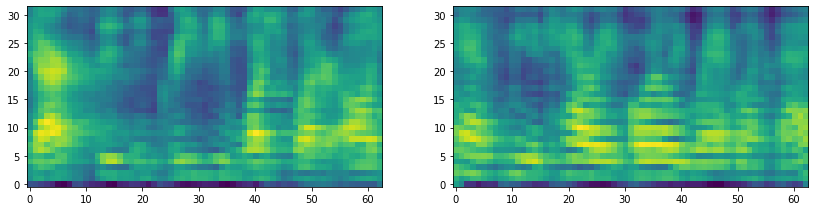

In [0]:
# COMPROBACIÓN. Mostrar espectrogramas de dos audios de salas distintas
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(X_train[290,:,:], origin='lower')

plt.subplot(122)
plt.imshow(X_train[1820,:,:], origin='lower')

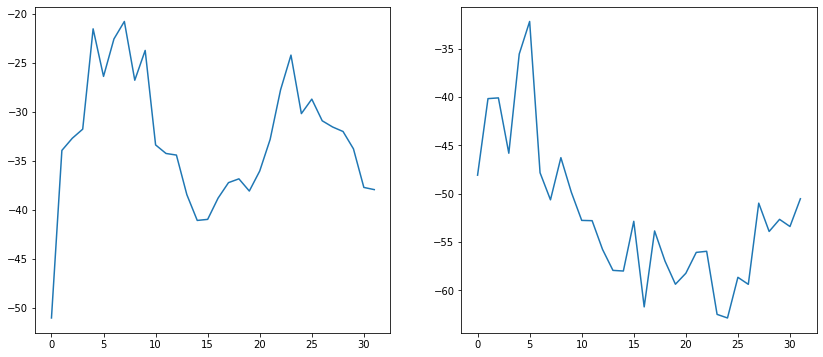

In [0]:
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.plot(X_train[290,:,0])

plt.subplot(122)
plt.plot(X_train[1810,:,0])

In [0]:
X_file = np.array(X_file)

In [0]:
X_file.shape

(7435,)

In [0]:
print(X_file[1810])

./TIMIT/train/dr6/fapb0/sx73.wav


In [0]:
y_train[303]

0

In [0]:
y_train[1]

0

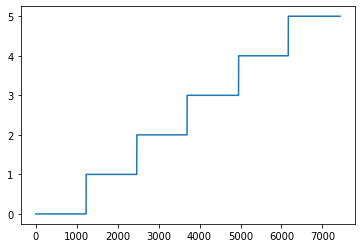

In [0]:
plt.plot(y_train)


# Preparar datos para train y validation


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_ohe, y_test_ohe = train_test_split(X_train, y_train_ohe, test_size=0.1, shuffle=True, random_state=42)

# Para normalizar se usan sólo los datos de Train para obtener la media y std

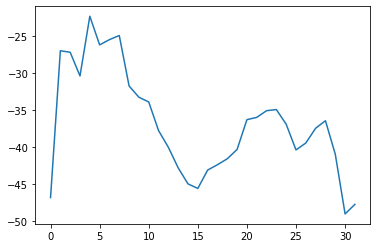

In [0]:
# Esta sería el espectro medio del audio 0

plt.plot(np.mean(X_train[0,:,:],axis=1))

In [0]:
X_train.shape[0]

6691

In [0]:
# Extraemos todos los espectros de todos los espectrogramas de todos los audios
X_all=[]

for i in range(X_train.shape[0]):  # shape 0 son todos los audios
  for j in range(X_train.shape[2]): # shape 2 son todas las ventanas de cada audio
    X_all.append(X_train[i,:,j])

Xmean = np.mean(X_all, axis =0)
Xstd = np.std(X_all,axis = 0)



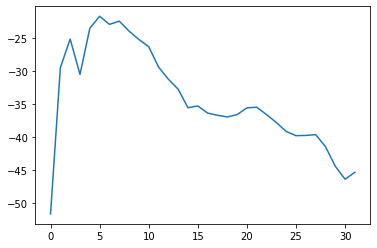

In [0]:
plt.plot(Xmean)

In [0]:
# Normalizar X_train, X_test y X_test_final, todos con Xmean y Xstd

X_train_N = np.zeros(X_train.shape)

for i in range(X_train.shape[0]):  # shape 0 son todos los audios
  for j in range(X_train.shape[2]): # shape 2 son todas las ventanas de cada audio
    X_train_N[i,:,j] = (X_train[i,:,j] - Xmean) / Xstd 

X_test_N = np.zeros(X_test.shape)

for i in range(X_test.shape[0]):  # shape 0 son todos los audios
  for j in range(X_test.shape[2]): # shape 2 son todas las ventanas de cada audio
    X_test_N[i,:,j] = (X_test[i,:,j] - Xmean) / Xstd 

X_test_final_N = np.zeros(X_test_final.shape)

for i in range(X_test_final.shape[0]):  # shape 0 son todos los audios
  for j in range(X_test_final.shape[2]): # shape 2 son todas las ventanas de cada audio
    X_test_final_N[i,:,j] = (X_test_final[i,:,j] - Xmean) / Xstd

In [0]:
X_train_N.shape

(6691, 32, 63)

In [0]:
X_test_final_N.shape

(1382, 32, 63)

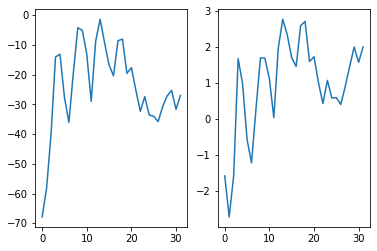

In [0]:
jj = 1300

plt.subplot(121)
plt.plot(X_train[jj,:,40])

plt.subplot(122)
plt.plot(X_train_N[jj,:,40])

In [0]:
# Añadir una dimensión más para que sea una imagen con un solo color (blanco y negro)
X_train = np.expand_dims(X_train_N, axis=-1)
X_test = np.expand_dims(X_test_N, axis=-1)
X_test_final =  np.expand_dims(X_test_final_N, axis=-1)

# **Entrenamiento y evaluación**

In [0]:
# Importar bibliotecas para el proceso de entrenamiento
from keras import losses, models, optimizers
from keras.models import Sequential
from keras.activations import relu, softmax
from keras.callbacks import (EarlyStopping, LearningRateScheduler,
                             ModelCheckpoint, TensorBoard, ReduceLROnPlateau)
from keras.layers import (Convolution1D, Dense, Dropout, GlobalAveragePooling1D, 
                          GlobalMaxPool1D, Input, MaxPool1D, concatenate)
from keras.utils import Sequence, to_categorical

from keras.layers import (Convolution2D, GlobalAveragePooling2D, BatchNormalization, Flatten,
                          GlobalMaxPool2D, MaxPool2D, concatenate, Activation)
from keras.utils import Sequence, to_categorical
from keras import backend as K

In [0]:
# Diseño del modelo

nclass = 6
    
model = Sequential() 
inp = Input((X_train.shape[1],X_train.shape[2],1))
x = Convolution2D(32, (2,2), padding="same")(inp)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = MaxPool2D()(x)
#x = Dropout(rate=0.5)(x)

x = Flatten()(x)
x = Dropout(rate=0.5)(x)
x = Dense(128)(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
out = Dense(nclass, activation=softmax)(x)

model = models.Model(inputs=inp, outputs=out)
opt = optimizers.Adam(lr = 0.001)
model.compile(optimizer=opt, loss=losses.categorical_crossentropy, metrics=['acc'])

In [0]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 63, 1)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 63, 32)        160       
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 63, 32)        128       
_________________________________________________________________
activation_3 (Activation)    (None, 32, 63, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 31, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 15872)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 15872)             0   

In [0]:
# Entrenamiento de los datos
checkpoint = ModelCheckpoint('best_FINAL.h5', monitor='val_loss', verbose=1,
                             save_best_only=True)

# Técnica de regulación para evitar overfitting (en concreto, en este caso aplico la detección temprana)
callbacks_list = [EarlyStopping(monitor='val_loss', patience=5),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

history = model.fit(X_train, y_train_ohe,
                        validation_data=(X_test, y_test_ohe),
                        callbacks=callbacks_list, 
                        batch_size=32, epochs=30)

Train on 6691 samples, validate on 744 samples
Epoch 1/30
6691/6691 [==============================] - 3s 449us/step - loss: 0.0217 - acc: 0.9931 - val_loss: 0.0165 - val_acc: 0.9946
Epoch 2/30
6691/6691 [==============================] - 3s 434us/step - loss: 0.0099 - acc: 0.9970 - val_loss: 0.0129 - val_acc: 0.9960
Epoch 3/30
6691/6691 [==============================] - 3s 440us/step - loss: 0.0049 - acc: 0.9993 - val_loss: 0.0095 - val_acc: 0.9960
Epoch 4/30
6691/6691 [==============================] - 3s 432us/step - loss: 0.0055 - acc: 0.9982 - val_loss: 0.0078 - val_acc: 0.9960
Epoch 5/30
6691/6691 [==============================] - 3s 434us/step - loss: 0.0076 - acc: 0.9979 - val_loss: 0.0091 - val_acc: 0.9973
Epoch 6/30
6691/6691 [==============================] - 3s 436us/step - loss: 0.0044 - acc: 0.9990 - val_loss: 0.0071 - val_acc: 0.9987
Epoch 7/30
6691/6691 [==============================] - 3s 433us/step - loss: 0.0051 - acc: 0.9987 - val_loss: 0.0069 - val_acc: 1.0000
E

In [0]:
# Evaluar modelo
print('\n# Evaluate on test data')
results = model.evaluate(X_test_final, y_test_final_ohe, batch_size=32)
print('test loss, test acc:', results)


# Evaluate on test data
1382/1382 [==============================] - 0s 163us/step
test loss, test acc: [0.06081393133028249, 0.9819102883338928]


Train Accuracy:  0.99
Test_Accuracy:  0.98


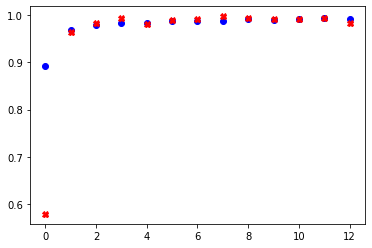

In [0]:
# Evolución del entrenamiento
import matplotlib.pyplot as plt

%matplotlib inline
print('Train Accuracy: ',np.round(history.history['acc'][-1],2))
print('Test_Accuracy: ',np.round(history.history['val_acc'][-1],2))

# Pintar curvas
plt.plot(history.history['acc'],'bo')
plt.plot(history.history['val_acc'],'rX')


In [0]:
# Obtener predicciones / probabilidades

pred_probabilities= model.predict(X_test)

print('First Five Probs.:\n',pred_probabilities[0:6])

print('\n\nFirst Five Classes:\n',y_test_ohe[0:6])

First Five Probs.:
 [[9.99999762e-01 4.09473380e-08 2.19358185e-07 6.05991772e-08
  5.39899271e-11 3.51153395e-09]
 [1.48918708e-08 6.64855834e-05 6.57757904e-10 9.99930501e-01
  1.12103660e-10 2.97049587e-06]
 [9.71036673e-01 1.04180690e-04 3.86414491e-03 1.05140767e-04
  2.51458132e-05 2.48647239e-02]
 [5.84895901e-08 1.10178189e-09 1.00000000e+00 1.99744973e-12
  5.47841980e-12 1.90753090e-14]
 [7.06067716e-04 9.99088526e-01 1.45952159e-04 4.66304471e-08
  2.55347040e-05 3.38380196e-05]
 [1.07991411e-07 3.17060582e-08 9.99999881e-01 1.00824115e-11
  6.96850744e-10 4.66372190e-15]]


First Five Classes:
 [[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [0]:
pred_probabilities2= model.predict(X_test_final)
print('First Five Probs.:\n',pred_probabilities[0:5])
print('\n\nFirst Five Classes:\n',y_test_final_ohe[0:5])

First Five Probs.:
 [[9.9999976e-01 4.0947338e-08 2.1935818e-07 6.0599177e-08 5.3989927e-11
  3.5115340e-09]
 [1.4891871e-08 6.6485583e-05 6.5775790e-10 9.9993050e-01 1.1210366e-10
  2.9704959e-06]
 [9.7103667e-01 1.0418069e-04 3.8641449e-03 1.0514077e-04 2.5145813e-05
  2.4864724e-02]
 [5.8489590e-08 1.1017819e-09 1.0000000e+00 1.9974497e-12 5.4784198e-12
  1.9075309e-14]
 [7.0606772e-04 9.9908853e-01 1.4595216e-04 4.6630447e-08 2.5534704e-05
  3.3838020e-05]]


First Five Classes:
 [[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]


# **Matriz de confusión y métricas de evaluación**

## Matriz de confusión (1º forma)

Confusion Matrix:
 [[226   0   6   1   0   0]
 [  3 219   6   0   0   0]
 [  0   0 228   0   0   0]
 [  0   0   1 226   0   3]
 [  0   0   4   0 229   0]
 [  0   0   0   1   0 229]] 




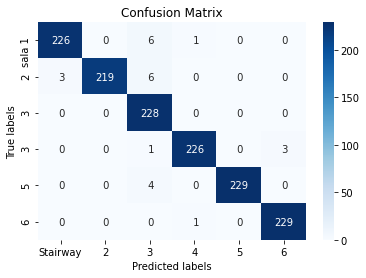

In [0]:
import seaborn as sns

from sklearn.metrics import confusion_matrix as cm

ConfMatrix=cm(np.argmax(y_test_final_ohe,1), np.argmax(pred_probabilities2,1))

print('Confusion Matrix:\n',ConfMatrix,'\n\n')

ax= plt.subplot()
sns.heatmap(ConfMatrix, annot=True, fmt='2d', cmap='Blues', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

ax.xaxis.set_ticklabels(['Stairway', '2','3','4','5', '6'])
ax.yaxis.set_ticklabels(['sala 1', '2','3','3','5', '6']);

## Matriz de confusión (2º forma)

In [0]:
# Importar biblioteca para otra forma de representar la matriz de confusión
import mlxtend
print(mlxtend.__version__) 

0.14.0


In [0]:
from mlxtend.plotting import plot_confusion_matrix

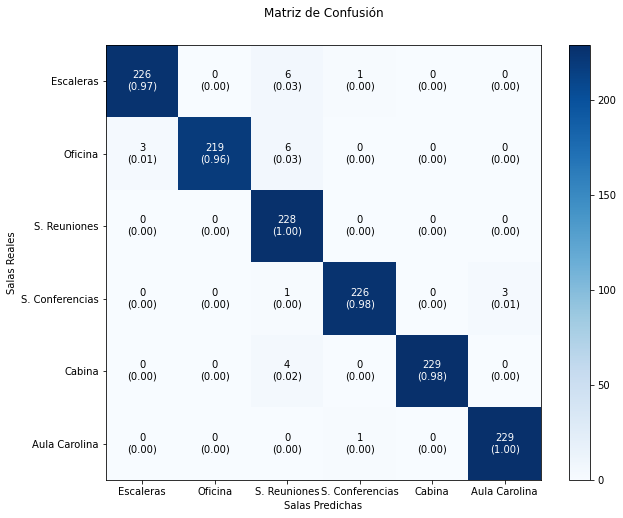

In [0]:
class_names = ['Escaleras', 'Oficina', 'S. Reuniones', 'S. Conferencias', 'Cabina', 'Aula Carolina']

fig, ax = plot_confusion_matrix(conf_mat=ConfMatrix,
                                show_absolute=True,
                                show_normed=True,
                                figsize = (10,8),
                                colorbar=True)
# labels, title and ticks
ax.set_xticklabels([''] + class_names) 
ax.set_yticklabels([''] + class_names) 
ax.set_xlabel('Salas Predichas')
ax.set_ylabel('Salas Reales')
ax.set_title('Matriz de Confusión')


plt.show()

## Métricas de evaluación

In [0]:
# Otras métricas de evaluación
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test_final_ohe,1), np.argmax(pred_probabilities2,1),  target_names=class_names))

                 precision    recall  f1-score   support

      Escaleras       0.99      0.97      0.98       233
        Oficina       1.00      0.96      0.98       228
   S. Reuniones       0.93      1.00      0.96       228
S. Conferencias       0.99      0.98      0.99       230
         Cabina       1.00      0.98      0.99       233
  Aula Carolina       0.99      1.00      0.99       230

       accuracy                           0.98      1382
      macro avg       0.98      0.98      0.98      1382
   weighted avg       0.98      0.98      0.98      1382

